- In this notebook, we do vesicle detection on microscopy images
- Then construct the data set for modeling

In [ ]:
# Add the src directory to sys.path
import sys
import os
sys.path.append(os.path.abspath('../src'))

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

from utils import *
from batch_run import run_batch_files_templates
import argparse
import pandas as pd
import time
import shutil
import re
import seaborn as sns

### Microscopy data processing

In [4]:
template1 = np.load('../Templates/template_656, 640, 71, 71.npy')
template2 = np.load('../Templates/Project_Whole Plate1_1024x1024_200Hz_1%Laser_800gain_B_5_R1.tif_enhance_482_20_56_56.npy')
template3 = np.load('../Templates/1024x1024 - 4 point_no-z-stack - split 5 rows rows only_TileScan 1_C_11_R2.npy')

In [5]:
templates = [template1, template2, template3]

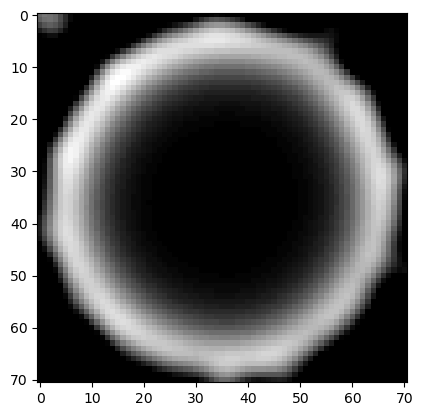

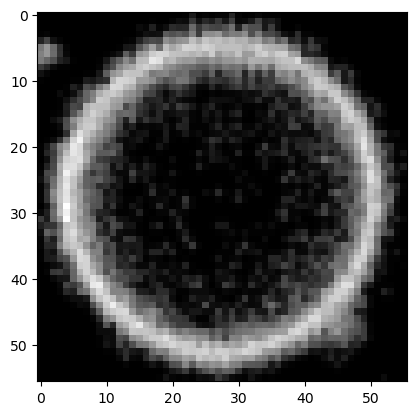

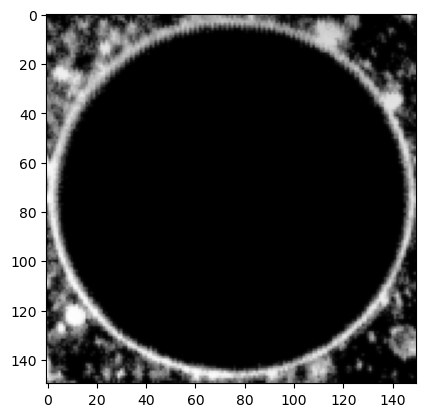

In [6]:
for template in templates:
    plt.imshow(template, cmap='gray')
    plt.show()

In [9]:
# The batch images not doing preprocessing, since singal are weak
file_folder= '../../data/20240523/OriginalImage/20240523_144037_160'
PlateName='Plate_20240525'
# Create the folder if it doesn't exist
folder_path = f"Results_{PlateName}"
os.makedirs(folder_path, exist_ok=True)
# file_template='Templates/Project_Whole Plate1_1024x1024_200Hz_1%Laser_800gain_B_5_R1.tif_enhance_482_20_56_56.npy'
# Record the start time
import time
start_time = time.time()
# file_template = load_template(template)
run_batch_files_templates(file_folder, templates, PlateName, \
                min_scale=0.3, max_scale=4, intervals=100, threshold = 0.5, Preprocess=False)

# Record the end time
end_time = time.time()

# Calculate the running time
running_time = end_time - start_time

print("Script execution time:", running_time, "seconds")

419 vesicles found
WellK14_PointK14_0000_ChannelNile Red_Seq0680.ome.tiff
18 vesicles found
WellH04_PointH04_0003_ChannelNile Red_Seq0475.ome.tiff
152 vesicles found
WellF10_PointF10_0003_ChannelNile Red_Seq0291.ome.tiff
3 vesicles found
WellD15_PointD15_0003_ChannelNile Red_Seq0111.ome.tiff
None vesicles found
WellE17_PointE17_0002_ChannelNile Red_Seq0218.ome.tiff
None vesicles found
WellK05_PointK05_0001_ChannelNile Red_Seq0645.ome.tiff
1 vesicles found
WellH09_PointH09_0000_ChannelNile Red_Seq0452.ome.tiff
154 vesicles found
WellE14_PointE14_0002_ChannelNile Red_Seq0206.ome.tiff
35 vesicles found
WellC08_PointC08_0001_ChannelNile Red_Seq0021.ome.tiff
7 vesicles found
WellC21_PointC21_0003_ChannelNile Red_Seq0075.ome.tiff
14 vesicles found
WellI20_PointI20_0003_ChannelNile Red_Seq0551.ome.tiff
None vesicles found
WellD13_PointD13_0001_ChannelNile Red_Seq0117.ome.tiff
6 vesicles found
WellC21_PointC21_0000_ChannelNile Red_Seq0072.ome.tiff
61 vesicles found
WellJ15_PointJ15_0002_Channe

### Data construction

In [4]:
df = pd.read_csv('../../data/20240523/VesicleDetection/Results_Plate_20240525/Plate_20240525_VesiclesSummary.csv')
df

,filename,num_vesicles,area_vesicles,area_percent
0,WellK14_PointK14_0000_ChannelNile Red_Seq0680....,419,199477.781734,0.190237
1,WellH04_PointH04_0003_ChannelNile Red_Seq0475....,18,4888.318169,0.004662
2,WellF10_PointF10_0003_ChannelNile Red_Seq0291....,152,63987.959168,0.061024
3,WellD15_PointD15_0003_ChannelNile Red_Seq0111....,3,1418.429083,0.001353
4,WellE17_PointE17_0002_ChannelNile Red_Seq0218....,0,0.000000,0.000000
...,...,...,...,...
771,WellD05_PointD05_0000_ChannelNile Red_Seq0148....,43,16376.337105,0.015618
772,WellG13_PointG13_0001_ChannelNile Red_Seq0361....,18,10237.665060,0.009763
773,WellE09_PointE09_0003_ChannelNile Red_Seq0187....,63,20898.659730,0.019931
774,WellK07_PointK07_0003_ChannelNile Red_Seq0655....,3,856.869396,0.000817


In [5]:
df_sorted = df.sort_values(by='filename')
df_sorted

,filename,num_vesicles,area_vesicles,area_percent
16,WellC03_PointC03_0000_ChannelNile Red_Seq0000....,0,0.000000,0.000000
548,WellC03_PointC03_0001_ChannelNile Red_Seq0001....,0,0.000000,0.000000
290,WellC03_PointC03_0002_ChannelNile Red_Seq0002....,0,0.000000,0.000000
634,WellC03_PointC03_0003_ChannelNile Red_Seq0003....,0,0.000000,0.000000
409,WellC04_PointC04_0000_ChannelNile Red_Seq0004....,0,0.000000,0.000000
...,...,...,...,...
408,WellL16_PointL16_0003_ChannelNile Red_Seq0723....,13,5478.152190,0.005224
81,WellL17_PointL17_0000_ChannelNile Red_Seq0716....,2,453.960138,0.000433
524,WellL17_PointL17_0001_ChannelNile Red_Seq0717....,0,0.000000,0.000000
43,WellL17_PointL17_0002_ChannelNile Red_Seq0718....,5,1367.378202,0.001304


In [7]:
# Extract the part before the first '_' in 'filename'
df_sorted['group'] = df_sorted['filename'].str.split('_').str[0]

# Group by 'group', take median of other columns, and keep the first row
df_final = df_sorted.groupby('group').agg({
    'filename': 'first',
    'num_vesicles': 'median',
    'area_vesicles': 'median',
    'area_percent': 'median'
}).reset_index(drop=True)

# Round num_vesicles to integer
df_final['num_vesicles'] = df_final['num_vesicles'].round().astype(int)
# By default, round() uses "round half to even" (also known as "bankers' rounding") 
# Extracting positions from filename column
df_final['position'] = df_final['filename'].str.extract(r'Well([A-Z]+\d+)_')

# Dropping the original filename column
df_final = df_final[['position', 'num_vesicles', 'area_vesicles', 'area_percent']]
df_final

,position,num_vesicles,area_vesicles,area_percent
0,C03,0,0.000000,0.000000
1,C04,0,0.000000,0.000000
2,C05,73,24059.494638,0.022945
3,C06,14,4842.765076,0.004618
4,C07,8,3991.000767,0.003806
...,...,...,...,...
189,L13,306,154572.249043,0.147412
190,L14,112,59615.254894,0.056854
191,L15,4,1881.421300,0.001794
192,L16,56,21393.460573,0.020402


In [9]:
df_final = df_final.iloc[0:-2, :]
df_final

,position,num_vesicles,area_vesicles,area_percent
0,C03,0,0.000000,0.000000
1,C04,0,0.000000,0.000000
2,C05,73,24059.494638,0.022945
3,C06,14,4842.765076,0.004618
4,C07,8,3991.000767,0.003806
...,...,...,...,...
187,L11,120,73872.587754,0.070450
188,L12,80,42984.056085,0.040993
189,L13,306,154572.249043,0.147412
190,L14,112,59615.254894,0.056854


/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

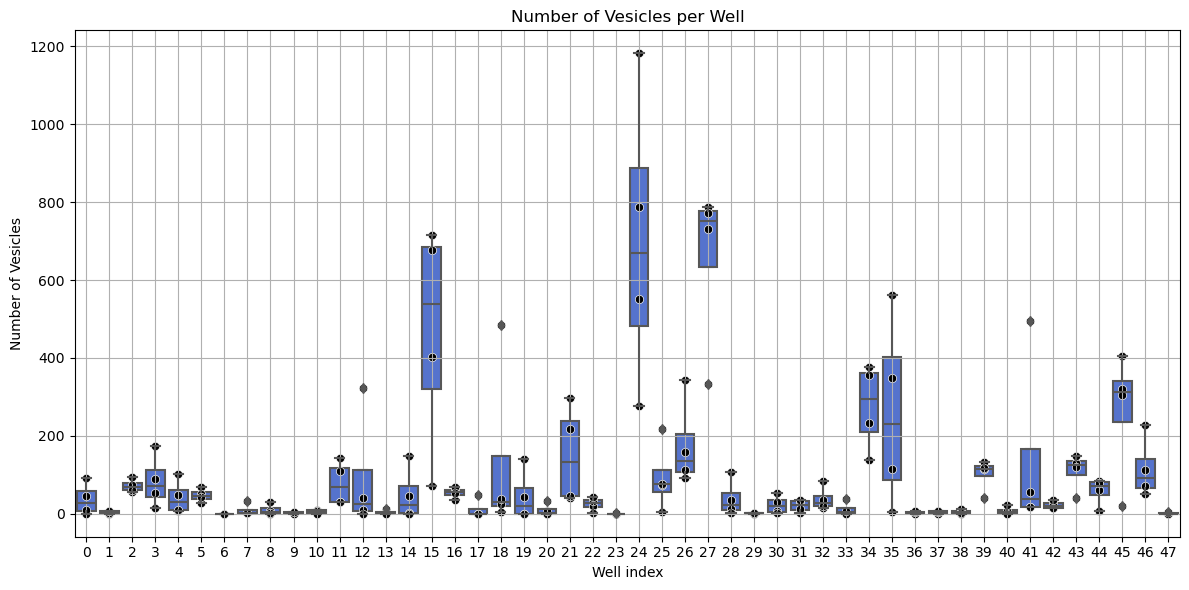

In [11]:
# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_final.index % 48, y='num_vesicles', data=df_final, color='royalblue')

# Scatter plot without NaN values
sns.scatterplot(x=df_final.index % 48, y='num_vesicles', data=df_final.dropna(), color='black', ax=ax)

# Set labels and title
ax.set_xlabel('Well index')
ax.set_ylabel('Number of Vesicles')
ax.set_title('Number of Vesicles per Well')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
num_rows_per_df = 48
numeric_df = df_final.select_dtypes(include=np.number)

# Calculate the median values along the rows
median_values = numeric_df.groupby(numeric_df.index % num_rows_per_df).median()

# Print the median values
median_values

,num_vesicles,area_vesicles,area_percent
0,27.5,21877.854890,0.020864
1,4.0,1500.110492,0.001431
2,67.5,22278.211604,0.021246
3,71.5,31083.114064,0.029643
4,29.0,13491.373301,0.012866
5,46.0,15498.458308,0.014780
6,0.0,0.000000,0.000000
7,2.0,1732.391999,0.001652
8,5.0,1742.798525,0.001662
9,2.0,615.752160,0.000587


In [13]:
dispense_df = pd.read_csv('dispense_df_GPC_20240520.csv')
dispense_df

,decanoic acid_Concentration (50 mM),decanoic acid_Concentration (10 mM),decanoic acid_Concentration (2 mM),decanoate_Concentration (50 mM),decanoate_Concentration (10 mM),decanoate_Concentration (2 mM),decylamine_Concentration (50 mM),decylamine_Concentration (10 mM),decylamine_Concentration (2 mM),decyl trimethylamine_Concentration (50 mM),decyl trimethylamine_Concentration (10 mM),decyl trimethylamine_Concentration (2 mM),decylsulfate_Concentration (50 mM),decylsulfate_Concentration (10 mM),decylsulfate_Concentration (2 mM),decanol_Concentration (15 mM),decanol_Concentration (3 mM),monocaprin_Concentration (10 mM),monocaprin_Concentration (2 mM)
0,0.0,19.6,0.0,0.0,7.4,0.0,0.0,0.0,14.1,0.0,16.8,0.0,9.6,0.0,0.0,5.2,0.0,0.0,6.2
1,7.7,0.0,0.0,4.9,0.0,0.0,5.2,0.0,0.0,0.0,15.5,0.0,5.6,0.0,0.0,8.5,0.0,0.0,5.1
2,9.6,0.0,0.0,0.0,0.0,14.6,0.0,0.0,8.3,0.0,14.8,0.0,5.3,0.0,0.0,0.0,11.0,9.8,0.0
3,6.1,0.0,0.0,0.0,19.2,0.0,4.4,0.0,0.0,0.0,12.9,0.0,5.0,0.0,0.0,0.0,14.2,9.2,0.0
4,7.0,0.0,0.0,6.6,0.0,0.0,0.0,0.0,1.4,0.0,7.9,0.0,9.0,0.0,0.0,7.3,0.0,0.0,3.2
5,5.8,0.0,0.0,9.5,0.0,0.0,0.0,0.0,18.8,5.9,0.0,0.0,0.0,17.9,0.0,6.8,0.0,5.3,0.0
6,8.8,0.0,0.0,4.1,0.0,0.0,0.0,0.0,2.0,0.0,9.5,0.0,6.7,0.0,0.0,0.0,5.6,0.0,14.2
7,7.9,0.0,0.0,0.0,18.9,0.0,6.5,0.0,0.0,0.0,0.0,13.9,8.0,0.0,0.0,4.9,0.0,0.0,6.5
8,7.9,0.0,0.0,0.0,11.5,0.0,0.0,9.3,0.0,0.0,8.6,0.0,6.8,0.0,0.0,7.9,0.0,9.0,0.0
9,9.9,0.0,0.0,8.8,0.0,0.0,0.0,12.1,0.0,0.0,12.8,0.0,0.0,15.0,0.0,0.0,4.5,7.0,0.0


In [14]:
# List of solutes you want to extract
solutes = ['decanoic acid', 'decanoate', 'decylamine', 'decyl trimethylamine', 'decylsulfate', 'decanol', 'monocaprin']

# Create a new DataFrame to store the results
result_df = pd.DataFrame()

for solute in solutes:
    solute_columns = [col for col in dispense_df.columns if solute in col]
    concentrations = [float(re.search(r'\d+', col).group()) for col in solute_columns]
    total_con_column = solute + '_Concentration (mM)'
    result_df[total_con_column] = (dispense_df[solute_columns] * concentrations).sum(axis=1)

# Display the new DataFrame with the added columns
# Divide all column values by 200
result_df = result_df.div(200)
result_df

,decanoic acid_Concentration (mM),decanoate_Concentration (mM),decylamine_Concentration (mM),decyl trimethylamine_Concentration (mM),decylsulfate_Concentration (mM),decanol_Concentration (mM),monocaprin_Concentration (mM)
0,0.980,0.370,0.141,0.840,2.400,0.3900,0.062
1,1.925,1.225,1.300,0.775,1.400,0.6375,0.051
2,2.400,0.146,0.083,0.740,1.325,0.1650,0.490
3,1.525,0.960,1.100,0.645,1.250,0.2130,0.460
4,1.750,1.650,0.014,0.395,2.250,0.5475,0.032
5,1.450,2.375,0.188,1.475,0.895,0.5100,0.265
6,2.200,1.025,0.020,0.475,1.675,0.0840,0.142
7,1.975,0.945,1.625,0.139,2.000,0.3675,0.065
8,1.975,0.575,0.465,0.430,1.700,0.5925,0.450
9,2.475,2.200,0.605,0.640,0.750,0.0675,0.350


In [15]:
df_combine = pd.concat([result_df, median_values], axis=1)
df_combine

,decanoic acid_Concentration (mM),decanoate_Concentration (mM),decylamine_Concentration (mM),decyl trimethylamine_Concentration (mM),decylsulfate_Concentration (mM),decanol_Concentration (mM),monocaprin_Concentration (mM),num_vesicles,area_vesicles,area_percent
0,0.980,0.370,0.141,0.840,2.400,0.3900,0.062,27.5,21877.854890,0.020864
1,1.925,1.225,1.300,0.775,1.400,0.6375,0.051,4.0,1500.110492,0.001431
2,2.400,0.146,0.083,0.740,1.325,0.1650,0.490,67.5,22278.211604,0.021246
3,1.525,0.960,1.100,0.645,1.250,0.2130,0.460,71.5,31083.114064,0.029643
4,1.750,1.650,0.014,0.395,2.250,0.5475,0.032,29.0,13491.373301,0.012866
5,1.450,2.375,0.188,1.475,0.895,0.5100,0.265,46.0,15498.458308,0.014780
6,2.200,1.025,0.020,0.475,1.675,0.0840,0.142,0.0,0.000000,0.000000
7,1.975,0.945,1.625,0.139,2.000,0.3675,0.065,2.0,1732.391999,0.001652
8,1.975,0.575,0.465,0.430,1.700,0.5925,0.450,5.0,1742.798525,0.001662
9,2.475,2.200,0.605,0.640,0.750,0.0675,0.350,2.0,615.752160,0.000587


In [16]:
df_combine.to_csv('df_combine_20240526.csv', index=False)

In [1]:
import pandas as pd
df_combine = pd.read_csv('df_combine_20240526.csv')
df_concentration = df_combine.iloc[:,0:7]
df_concentration.to_csv('df_concentration_20240526.csv', index=False)